In [191]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [192]:
#글씨설정
plt.rc("font",family="Malgun Gothic")
sns.set(font="Margun Gothic",rc={"axes.unicode_minus":False},style='darkgrid')
mpl.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#맷플롯립 한글 설정
font_path = r'C:\Users\dudtj\OneDrive\Desktop\금융데이터\NanumFontSetup_TTF_ALL'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [193]:
#matplotlib 패키지 한글 깨짐 처리 시작
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [194]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')

In [195]:
#매출금액 단위 만원으로 변환 
data['매출금액'] = data['매출금액']/10000
data.rename(columns={'매출금액' : '매출금액(단위:만원)'}, inplace=True)
#매출 건수 한 건당 매출금액 컬럼 추가
data['건당 매출금액(단위:만원)'] = data['매출금액(단위:만원)']/data['매출건수']

In [196]:
data_e = data[data['품목대분류명'] == 'e상품/서비스']

In [197]:
data_e['성별'].value_counts()

여성    42539
남성    33513
Name: 성별, dtype: int64

In [198]:
data_e['성별'].groupby(data_e['품목중분류명']).value_counts()

품목중분류명   성별
e머니/상품권  여성    11767
         남성    10176
o2o서비스   여성    22804
         남성    19260
모바일상품    여성     7968
         남성     4077
Name: 성별, dtype: int64

<AxesSubplot:xlabel='기준년월', ylabel='count'>

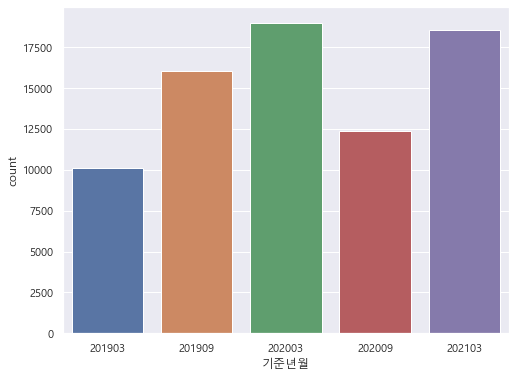

In [199]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.countplot(x = '기준년월', data = data_e)

In [200]:
data_df = pd.DataFrame(data_e)

In [201]:
#월별 barplot
def get_barplot_C_M(category):
    dfLC = data_df[['기준년월', '품목대분류명','품목중분류명','매출건수']]
    dfLC_bar = dfLC[dfLC['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    sns.barplot(x = '품목중분류명', y = '매출건수', hue = '기준년월', data = dfLC_bar, edgecolor = 'black')

def get_barplot_M_M(category):
    dfLM = data_df[['기준년월', '품목대분류명','품목중분류명','매출금액(단위:만원)']]
    dfLM_bar = dfLM[dfLM['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    sns.barplot(x = '품목중분류명', y = '매출금액(단위:만원)', hue = '기준년월', data = dfLM_bar, edgecolor = 'black')
def get_barplot_CM_M(category):
    dfCM = data_df[['기준년월', '품목대분류명', '품목중분류명','건당 매출금액(단위:만원)']]
    dfCM_bar = dfCM[dfCM['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    sns.barplot(x = '품목중분류명', y = '건당 매출금액(단위:만원)', hue = '기준년월', data = dfCM_bar, edgecolor = 'black')

<AxesSubplot:xlabel='품목중분류명', ylabel='건당 매출금액(단위:만원)'>

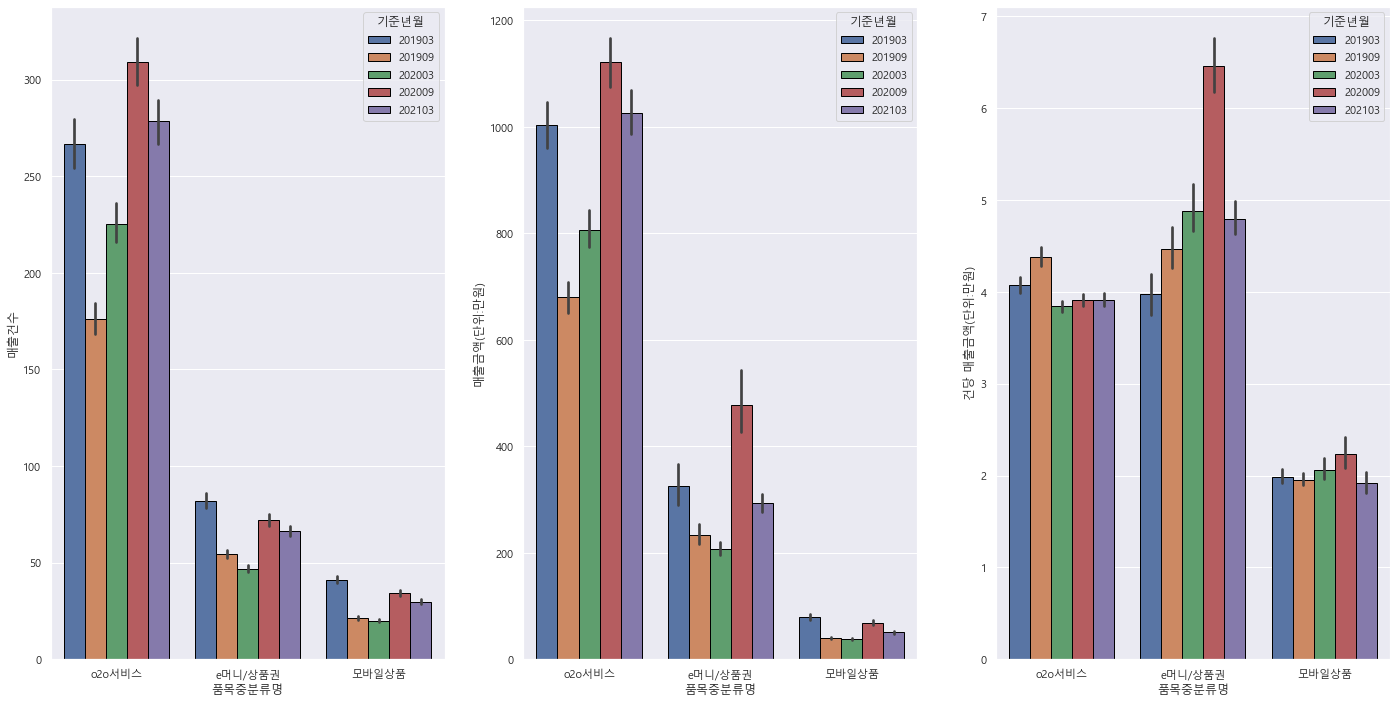

In [202]:
figure,((ax1,ax2,ax3))=plt.subplots(nrows=1,ncols=3)
figure.set_size_inches(24,12)
dfLC = data_df[['기준년월', '품목대분류명','품목중분류명','매출건수']]
dfLC_bar = dfLC[dfLC['품목대분류명'] == 'e상품/서비스']
sns.barplot(x = '품목중분류명', y = '매출건수', hue = '기준년월', data = dfLC_bar, edgecolor = 'black',ax=ax1)

dfLM = data_df[['기준년월', '품목대분류명','품목중분류명','매출금액(단위:만원)']]
dfLM_bar = dfLM[dfLM['품목대분류명'] =='e상품/서비스']

sns.barplot(x = '품목중분류명', y = '매출금액(단위:만원)', hue = '기준년월', data = dfLM_bar, edgecolor = 'black',ax=ax2)
dfCM = data_df[['기준년월', '품목대분류명', '품목중분류명','건당 매출금액(단위:만원)']]
dfCM_bar = dfCM[dfCM['품목대분류명'] == 'e상품/서비스']
sns.barplot(x = '품목중분류명', y = '건당 매출금액(단위:만원)', hue = '기준년월', data = dfCM_bar, edgecolor = 'black',ax=ax3)

In [203]:
#매출건수 baplot
#get_barplot_C_M('e상품/서비스')

#매출금액 barplot
#get_barplot_M_M('e상품/서비스')

#건당 매출금액 평균 barplot
#get_barplot_CM_M('e상품/서비스')

In [204]:
#성별 barplot
def get_barplot_C_S(category):
    dfLC = data_df[['기준년월', '품목대분류명', '성별','품목중분류명','매출건수']]
    dfLC_bar = dfLC[dfLC['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (4, 3))
    sns.barplot(x = '품목중분류명', y = '매출건수', hue = '성별', data = dfLC_bar, edgecolor = 'black')

def get_barplot_M_S(category):
    dfLM = data_df[['기준년월', '품목대분류명','성별','품목중분류명','매출금액(단위:만원)']]
    dfLM_bar = dfLM[dfLM['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (4, 3))
    sns.barplot(x = '품목중분류명', y = '매출금액(단위:만원)', hue = '성별', data = dfLM_bar, edgecolor = 'black')

def get_barplot_CM_S(category):
    dfCM = data_df[['기준년월', '품목대분류명', '품목중분류명', '성별', '건당 매출금액(단위:만원)']]
    dfCM_bar = dfCM[dfCM['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (4, 3))
    sns.barplot(x = '품목중분류명', y = '건당 매출금액(단위:만원)', hue = '성별', data = dfCM_bar, edgecolor = 'black')

<AxesSubplot:xlabel='품목중분류명', ylabel='건당 매출금액(단위:만원)'>

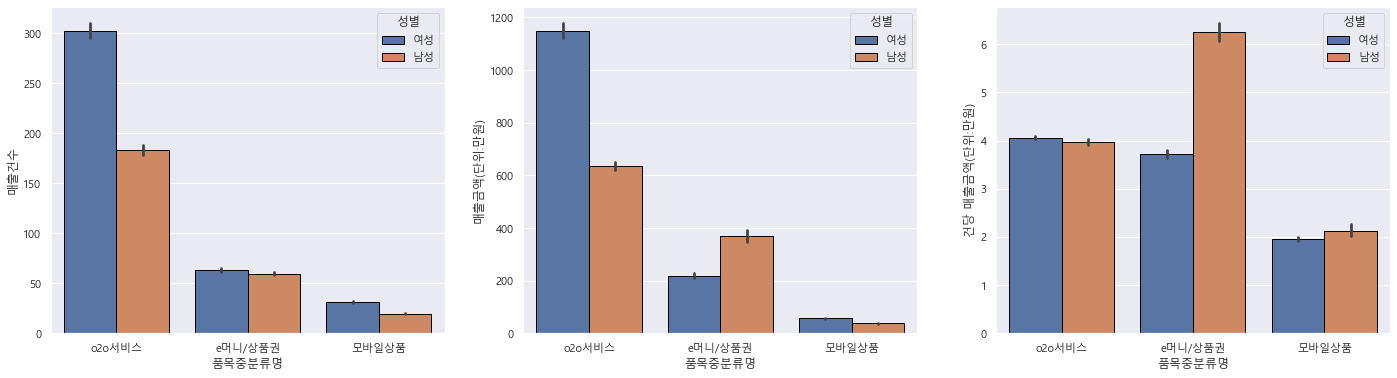

In [205]:
figure,((ax1,ax2,ax3))=plt.subplots(nrows=1,ncols=3)
figure.set_size_inches(24,6)
dfLC = data_df[['기준년월', '품목대분류명', '성별','품목중분류명','매출건수']]
dfLC_bar = dfLC[dfLC['품목대분류명'] == 'e상품/서비스']
sns.barplot(x = '품목중분류명', y = '매출건수', hue = '성별', data = dfLC_bar, edgecolor = 'black',ax=ax1)
dfLM = data_df[['기준년월', '품목대분류명','성별','품목중분류명','매출금액(단위:만원)']]
dfLM_bar = dfLM[dfLM['품목대분류명'] =='e상품/서비스']
sns.barplot(x = '품목중분류명', y = '매출금액(단위:만원)', hue = '성별', data = dfLM_bar, edgecolor = 'black',ax=ax2)
dfCM = data_df[['기준년월', '품목대분류명', '품목중분류명', '성별', '건당 매출금액(단위:만원)']]
dfCM_bar = dfCM[dfCM['품목대분류명'] == 'e상품/서비스']
sns.barplot(x = '품목중분류명', y = '건당 매출금액(단위:만원)', hue = '성별', data = dfCM_bar, edgecolor = 'black',ax=ax3)

In [206]:
#매출건수 성별 중분류
#get_barplot_C_S('e상품/서비스')

#매출금액 성별 중분류
#get_barplot_M_S('e상품/서비스')

#건당 매출금액 성별 중분류
#get_barplot_CM_S('e상품/서비스')
#건당 매출금액은 남성이 더 높음

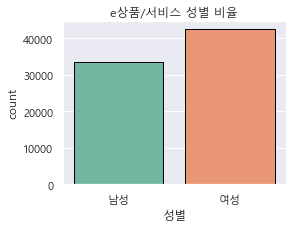

In [207]:
#여가/스포츠 성별 비율
group_names = ['남성','여성']
fig, ax = plt.subplots(1, 1, figsize = (4, 3))
sns.countplot(x = '성별', data = data_e, edgecolor= 'black', palette='Set2',order=group_names)
ax.set_title('e상품/서비스 성별 비율')
plt.show()

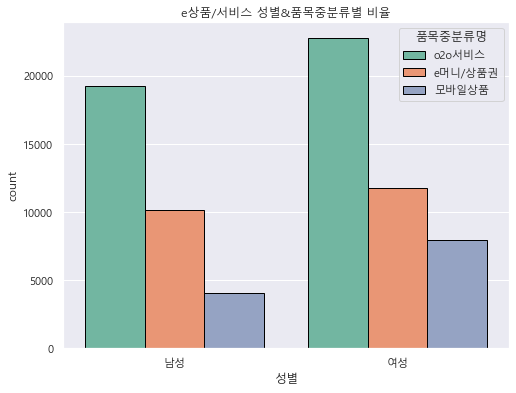

In [208]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.countplot(x = '성별', data = data_e, edgecolor= 'black', palette='Set2', hue = '품목중분류명',order=group_names)

ax.set_title('e상품/서비스 성별&품목중분류별 비율')
plt.show()

#남성이 문화를 즐기는게 낮음

C:\Users\dudtj\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


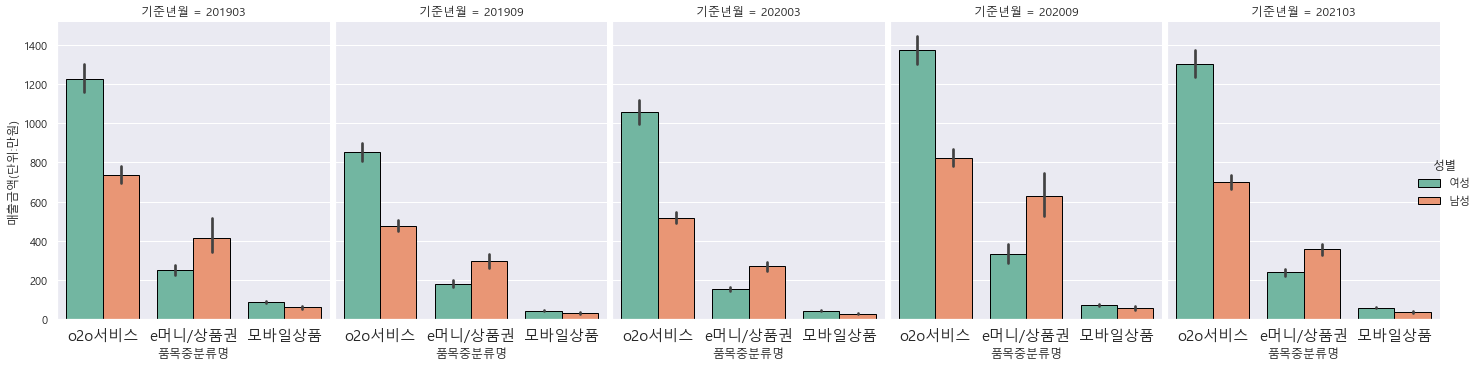

In [209]:
f=sns.factorplot(x = '품목중분류명',y = '매출금액(단위:만원)', data = data_e, edgecolor= 'black', palette='Set2', \
    hue = '성별', col = '기준년월', kind = 'bar', aspect = 2)
f.fig.set_size_inches(20, 5)
f.set_xticklabels(['o2o서비스','e머니/상품권','모바일상품'], fontsize= 15)
plt.show()

C:\Users\dudtj\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


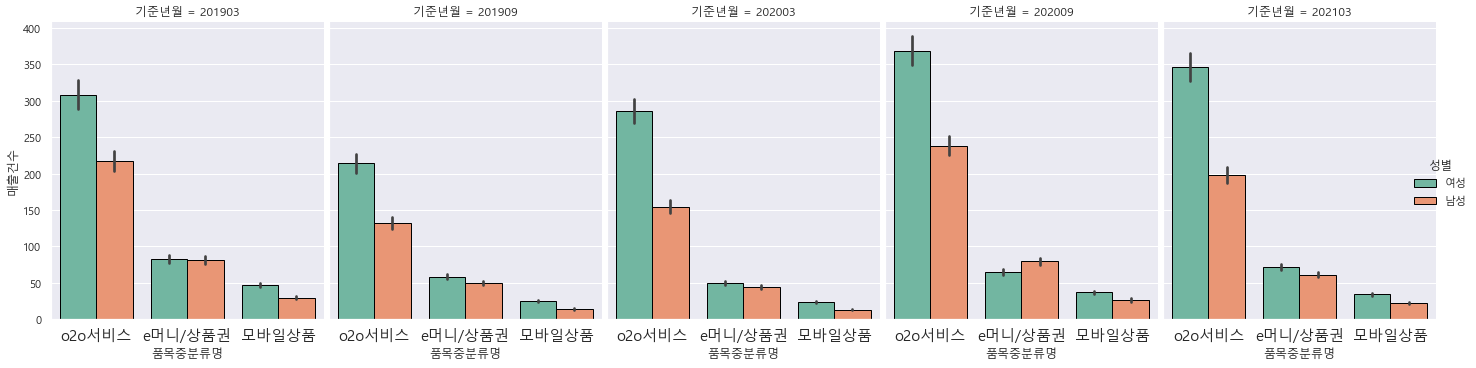

In [210]:
f=sns.factorplot(x = '품목중분류명',y = '매출건수', data = data_e, edgecolor= 'black', palette='Set2', hue = '성별', col = '기준년월', kind = 'bar', aspect = 2)
f.fig.set_size_inches(20, 5)
f.set_xticklabels(['o2o서비스','e머니/상품권','모바일상품'], fontsize= 15)
plt.show()

C:\Users\dudtj\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


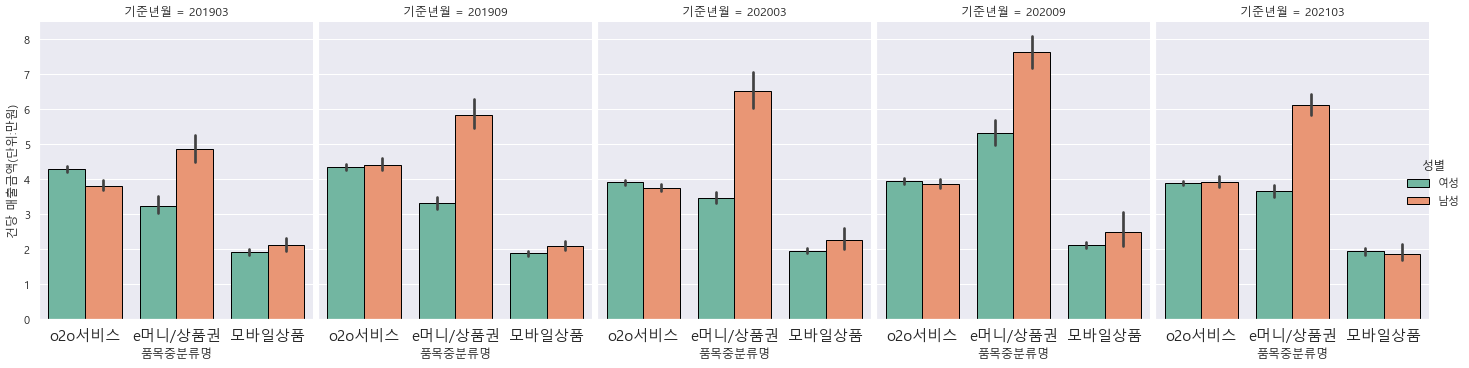

In [211]:
f=sns.factorplot(x = '품목중분류명',y = '건당 매출금액(단위:만원)', data = data_e, edgecolor= 'black', palette='Set2', hue = '성별', col = '기준년월', kind = 'bar', aspect = 2)
f.fig.set_size_inches(20, 5)
f.set_xticklabels(['o2o서비스','e머니/상품권','모바일상품'], fontsize= 15)
plt.show()

C:\Users\dudtj\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


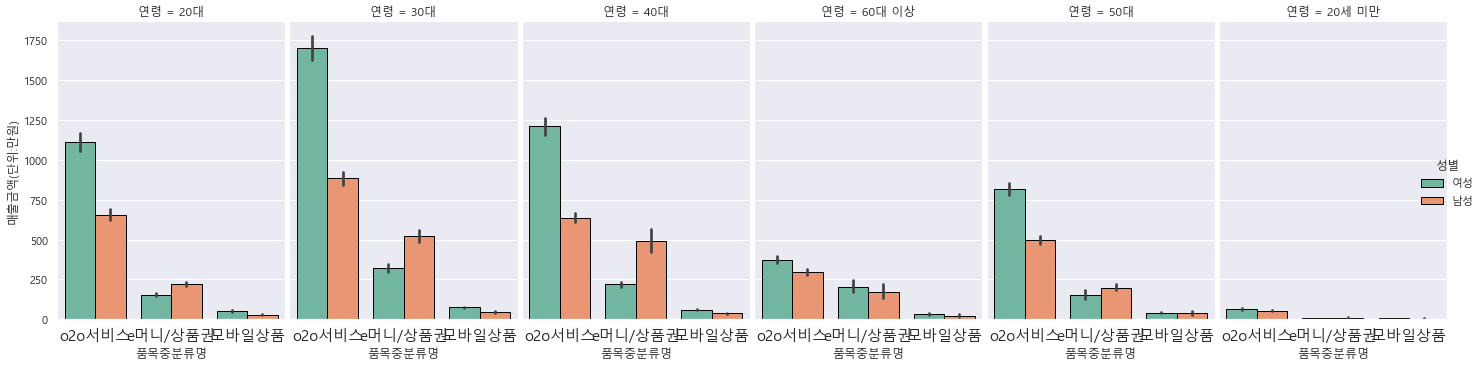

In [212]:
f=sns.factorplot(x = '품목중분류명',y = '매출금액(단위:만원)', data = data_e, edgecolor= 'black', palette='Set2', hue = '성별', col = '연령', kind = 'bar', aspect = 2)
f.fig.set_size_inches(20, 5)
f.set_xticklabels(['o2o서비스','e머니/상품권','모바일상품'], fontsize= 15)
plt.show()

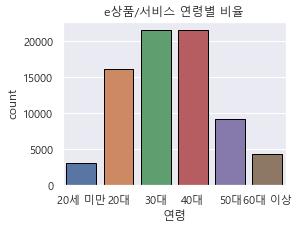

In [213]:
#여가/스포츠 연령별 건수 비율
group_names = ['20세 미만', '20대', '30대', '40대', '50대', '60대 이상']
fig, ax = plt.subplots(1, 1, figsize = (4,3))
sns.countplot(x = '연령', data = data_e, edgecolor = 'black', order=group_names)
ax.set_title('e상품/서비스 연령별 비율')
plt.show()

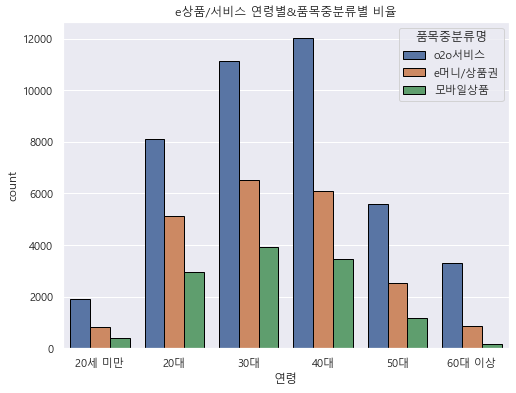

In [214]:
fig, ax = plt.subplots(1, 1, figsize = (8,6))
sns.countplot(x = '연령', data = data_e, edgecolor= 'black', hue = '품목중분류명', order=group_names)
ax.set_title('e상품/서비스 연령별&품목중분류별 비율')
plt.show()

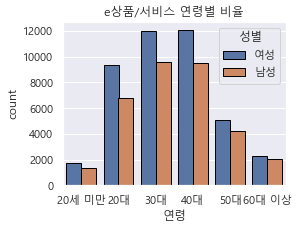

In [215]:
#전자 성별&연령별 건수 비율
fig, ax = plt.subplots(1, 1, figsize = (4 ,3))
sns.countplot(x = '연령', data = data_e, hue = '성별', edgecolor = 'black', order=group_names)
ax.set_title('e상품/서비스 연령별 비율')
plt.show()

In [216]:
data_e['고객소재지_광역시도'].value_counts()
#사람수는 경기도가 인천보다 2배이상 많음

서울특별시    44712
경기도      20739
인천광역시    10601
Name: 고객소재지_광역시도, dtype: int64

In [217]:
data_e['매출건수'].groupby(data_e['고객소재지_광역시도']).sum()
#사람 수 대비 매출건수는 인천이 더 많음 

고객소재지_광역시도
경기도      2667263
서울특별시    7690582
인천광역시    1751454
Name: 매출건수, dtype: int64

In [218]:
data_e['매출건수'].groupby(data_e['고객소재지_광역시도']).mean()

고객소재지_광역시도
경기도      128.610974
서울특별시    172.002639
인천광역시    165.215923
Name: 매출건수, dtype: float64

In [219]:
data_e['매출금액(단위:만원)'].groupby(data_e['고객소재지_광역시도']).mean()

고객소재지_광역시도
경기도      497.133258
서울특별시    651.681603
인천광역시    563.108821
Name: 매출금액(단위:만원), dtype: float64

In [220]:
data_e['건당 매출금액(단위:만원)'].groupby(data_e['고객소재지_광역시도']).mean()

고객소재지_광역시도
경기도      3.990064
서울특별시    4.038326
인천광역시    3.517096
Name: 건당 매출금액(단위:만원), dtype: float64

Text(0.5, 1.0, '광역시도별 건당 매출금액 평균')

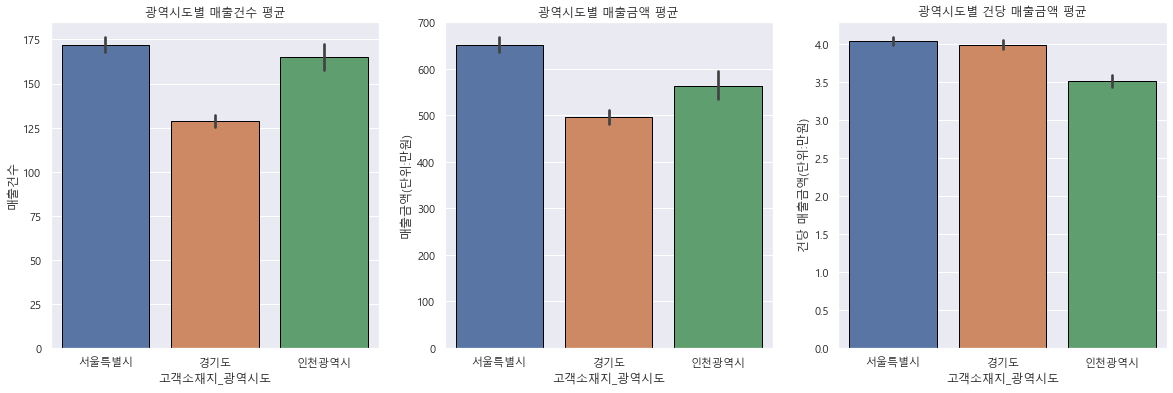

In [221]:
#위 사실을 조금 더 명확하게 확인하기 위해 시각화

#매출건수 평균 baplot
fig, ax = plt.subplots(figsize = (20, 6), ncols= 3)
sns.barplot(x = '고객소재지_광역시도', y = '매출건수', data = data_e, ax = ax[0], edgecolor = 'black')
ax[0].set_title('광역시도별 매출건수 평균')

#매출금액 평균 barplot
sns.barplot(x = '고객소재지_광역시도', y = '매출금액(단위:만원)', data = data_e, ax = ax[1], edgecolor = 'black')
ax[1].set_title('광역시도별 매출금액 평균')

#건당 매출금액 평균 barplot
sns.barplot(x = '고객소재지_광역시도', y = '건당 매출금액(단위:만원)', data = data_e, ax = ax[2], edgecolor = 'black')
ax[2].set_title('광역시도별 건당 매출금액 평균')

In [222]:
data_e['고객소재지_광역시도'].value_counts()

서울특별시    44712
경기도      20739
인천광역시    10601
Name: 고객소재지_광역시도, dtype: int64

Text(0, 0.5, '광역시도별 결제건수 = 사람수')

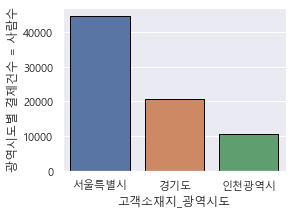

In [223]:
#반면에 인천의 사람 수는 훨씬 적음
fig, ax = plt.subplots(1, 1, figsize = (4 ,3))
sns.countplot(x = '고객소재지_광역시도', data = data_e, edgecolor = 'black')
ax.set_ylabel('광역시도별 결제건수 = 사람수')


### 결론 : 경기도 사람이 인천 & 서울시보다 여가/스포츠에 쓰는 돈도 적음

### 생각보다 인천광역시 사람들이 여가/스포츠에 쓰는 돈이 많다.

In [224]:
### 지역(구)에 따라서 중분류의 차이 비교하기 ###

data_e_Seoul = data_e[data_e['고객소재지_광역시도'] == '서울특별시']
df1 = pd.DataFrame(data_e_Seoul['고객소재지_시군구'].value_counts())
df1.sort_values(by = ['고객소재지_시군구'], axis=0, inplace=True)
df1.reset_index(inplace=True)
df1.rename(columns={'index' : '고객소재지_시군구', '고객소재지_시군구' : '합계'}, inplace=True)
df1

,고객소재지_시군구,합계
0,금천구,672
1,관악구,754
2,강북구,792
3,양천구,808
4,도봉구,862
5,노원구,1207
6,중랑구,1259
7,광진구,1333
8,중구,1463
9,서초구,1550


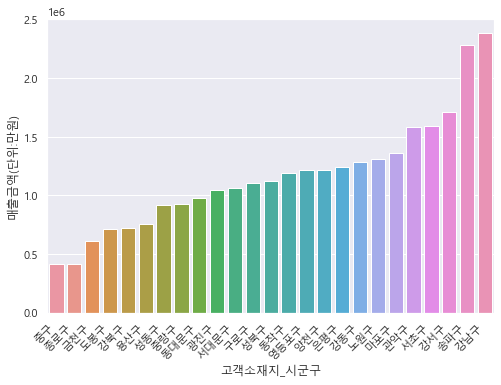

In [225]:
df = pd.DataFrame(data_e_Seoul['매출금액(단위:만원)'].groupby(data_e_Seoul['고객소재지_시군구']).sum())
df.reset_index(inplace=True)
df.sort_values(by = '매출금액(단위:만원)', axis = 0, inplace= True)
fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
sns.barplot(x = '고객소재지_시군구', y = '매출금액(단위:만원)', data= df)
fig.autofmt_xdate(rotation = 45)

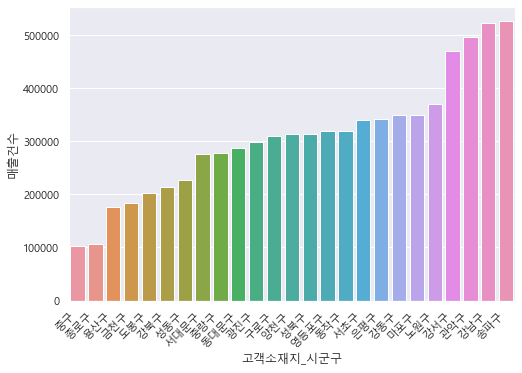

In [226]:
df = pd.DataFrame(data_e_Seoul['매출건수'].groupby(data_e_Seoul['고객소재지_시군구']).sum())
df.reset_index(inplace=True)
df.sort_values(by = '매출건수', axis = 0, inplace= True)
fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
sns.barplot(x = '고객소재지_시군구', y = '매출건수', data= df)
fig.autofmt_xdate(rotation = 45)

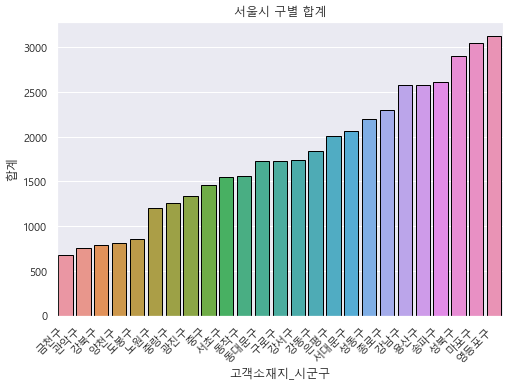

In [227]:
fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
sns.barplot(x = '고객소재지_시군구', y = '합계',data = df1, edgecolor = 'black')
ax.set_title('서울시 구별 합계')

fig.autofmt_xdate(rotation = 45)
plt.show()

In [228]:
###매출금액 평균도 비교하기 ###
df = pd.DataFrame(data_e_Seoul['매출금액(단위:만원)'].groupby(data_e_Seoul['고객소재지_시군구']).mean())
df.sort_values(by = ['매출금액(단위:만원)'], inplace=True)
df.reset_index(inplace=True)

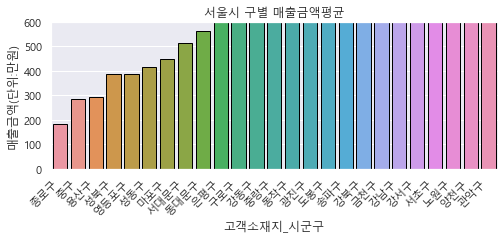

In [229]:
fig, ax = plt.subplots(1, 1, figsize = (8,3))
sns.barplot(x = '고객소재지_시군구', y = '매출금액(단위:만원)',data = df, edgecolor = 'black')
ax.set_title('서울시 구별 매출금액평균')
ax.set(ylim = [0, 600])
fig.autofmt_xdate(rotation = 45)
plt.show()

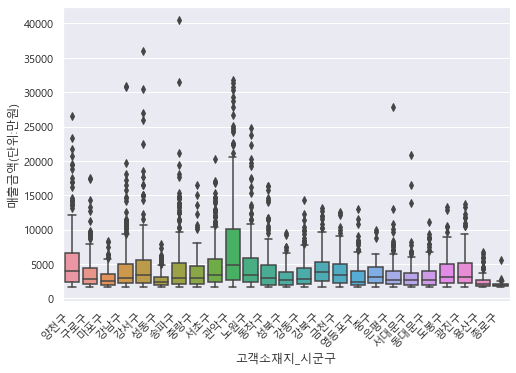

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액(단위:만원),매출건수,건당 매출금액(단위:만원)
89,201903,21,e상품/서비스,2110,o2o서비스,여성,40대,초중고자녀가구,서울특별시,양천구,목동,14153.7942,2977,4.754382
542,201903,21,e상품/서비스,2110,o2o서비스,남성,30대,신혼영유아가구,서울특별시,구로구,개봉동,4548.1451,1263,3.601065
737,201903,21,e상품/서비스,2110,o2o서비스,남성,30대,신혼영유아가구,서울특별시,마포구,공덕동,1703.9766,542,3.143868
894,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,구로동,1629.7801,529,3.080870
896,201903,21,e상품/서비스,2110,o2o서비스,남성,40대,초중고자녀가구,서울특별시,구로구,구로동,3605.4942,863,4.177861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517534,202103,21,e상품/서비스,2110,o2o서비스,여성,30대,신혼영유아가구,서울특별시,성동구,금호동3가,1959.0056,460,4.258708
517622,202103,21,e상품/서비스,2110,o2o서비스,남성,30대,신혼영유아가구,서울특별시,성동구,하왕십리동,2284.0141,631,3.619674
517623,202103,21,e상품/서비스,2110,o2o서비스,여성,40대,초중고자녀가구,서울특별시,성동구,하왕십리동,1906.3580,484,3.938756
517822,202103,21,e상품/서비스,2111,e머니/상품권,남성,20대,1인가구,서울특별시,노원구,공릉동,2242.9968,213,10.530501


In [230]:
def cut_point(quanti, data):
    a = quanti
    cut_po=data['매출금액(단위:만원)'].quantile(a)
    df_cut=data[data['매출금액(단위:만원)'] > cut_po]
    fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
    sns.boxplot(x = '고객소재지_시군구', y = '매출금액(단위:만원)', data = df_cut)
    fig.autofmt_xdate(rotation = 45)
    plt.show()
    return df_cut

cut_point(0.90, data_e_Seoul)

In [231]:
## 건당 매출금액 ##
df = pd.DataFrame(data_e_Seoul['건당 매출금액(단위:만원)'].groupby(data_e_Seoul['고객소재지_시군구']).mean())
df.sort_values(by = ['건당 매출금액(단위:만원)'], inplace=True)
df.reset_index(inplace=True)

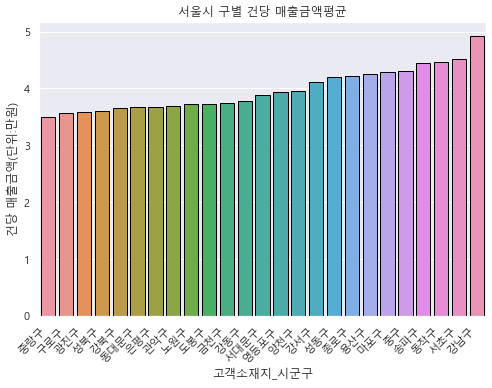

In [232]:
fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
sns.barplot(x = '고객소재지_시군구', y = '건당 매출금액(단위:만원)',data = df, edgecolor = 'black')
ax.set_title('서울시 구별 건당 매출금액평균')
fig.autofmt_xdate(rotation = 45)
plt.show()


In [233]:
data_e_Gyeong = data_e[data_e['고객소재지_광역시도'] == '경기도']
data_e_Incheon = data_e[data_e['고객소재지_광역시도'] == '인천광역시']

Text(0.5, 1.0, '인천광역시 품목중분류')

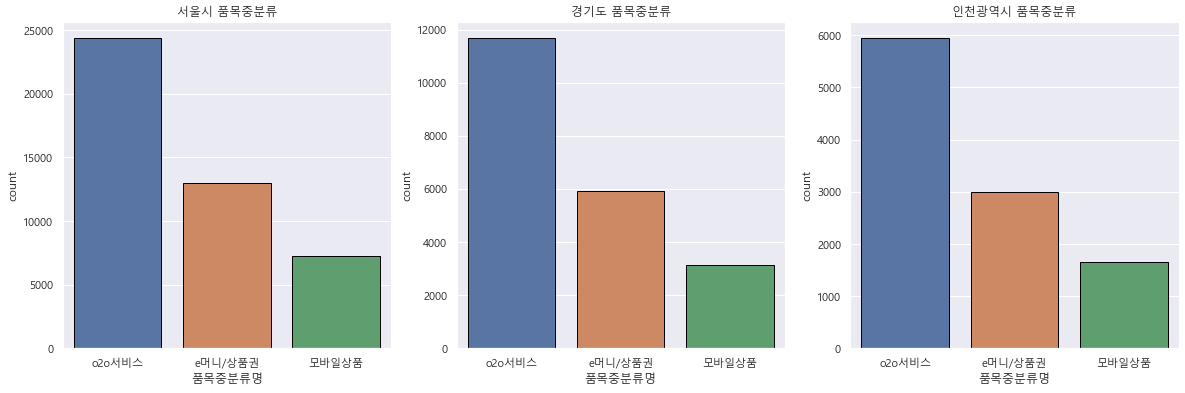

In [234]:
fig, ax = plt.subplots(figsize = (20, 6), ncols= 3)
group_names = ['o2o서비스','e머니/상품권','모바일상품']

#서울시 중분류
sns.countplot(x = '품목중분류명', data = data_e_Seoul, ax = ax[0], edgecolor = 'black', order=group_names)
ax[0].set_title('서울시 품목중분류')

#경기도 중분류
sns.countplot(x = '품목중분류명', data = data_e_Gyeong, ax = ax[1], edgecolor = 'black', order=group_names)
ax[1].set_title('경기도 품목중분류')

#인천광역시 중분류
sns.countplot(x = '품목중분류명', data = data_e_Incheon, ax = ax[2], edgecolor = 'black', order= group_names)
ax[2].set_title('인천광역시 품목중분류')

In [235]:
data_e_Seoul.sort_values(by = ['성별'],inplace=True)
data_e_Gyeong.sort_values(by = ['성별'], inplace=True)
data_e_Incheon.sort_values(by = ['성별'], inplace=True)

<ipython-input-235-d10f3e9ab86e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Seoul.sort_values(by = ['성별'],inplace=True)
<ipython-input-235-d10f3e9ab86e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Gyeong.sort_values(by = ['성별'], inplace=True)
<ipython-input-235-d10f3e9ab86e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Incheon.sort_values(by = ['성별'], inplace=True)


Text(0.5, 1.0, '인천광역시 품목중분류')

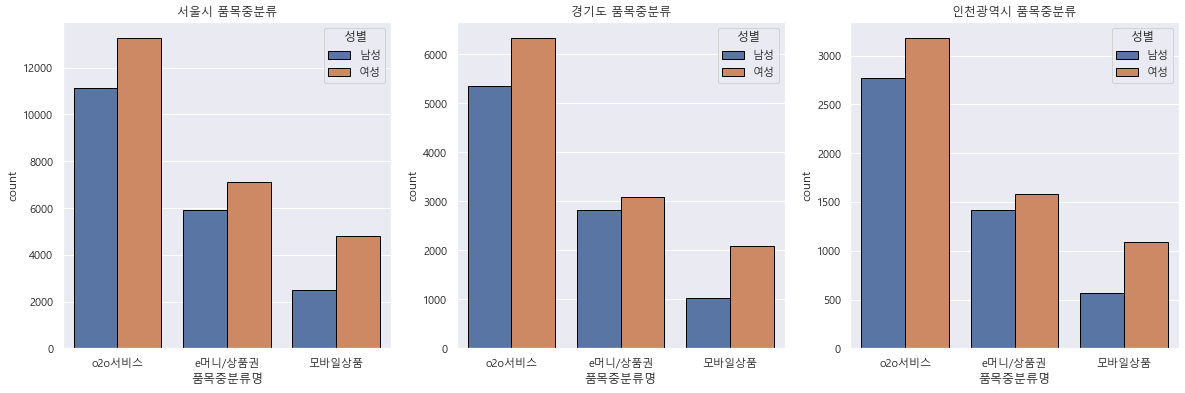

In [236]:
#지역 & 성별
#서울시 중분류
fig, ax = plt.subplots(figsize = (20, 6), ncols= 3)
group_names = ['o2o서비스','e머니/상품권','모바일상품']
sns.countplot(x = '품목중분류명', data = data_e_Seoul, ax = ax[0],edgecolor = 'black', order=group_names, hue = '성별')
ax[0].set_title('서울시 품목중분류')

#경기도 중분류
sns.countplot(x = '품목중분류명', data = data_e_Gyeong, ax = ax[1],edgecolor = 'black', order=group_names,hue = '성별')
ax[1].set_title('경기도 품목중분류')

#인천광역시 중분류
sns.countplot(x = '품목중분류명', data = data_e_Incheon, ax = ax[2], edgecolor = 'black', order= group_names, hue = '성별')
ax[2].set_title('인천광역시 품목중분류')


#도시별 패턴이 비슷

<ipython-input-237-f76c1c9e8994>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Seoul.sort_values(by = ['연령'], inplace=True)
<ipython-input-237-f76c1c9e8994>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Gyeong.sort_values(by = ['연령'], inplace=True)
<ipython-input-237-f76c1c9e8994>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Incheon.sort_values(by = ['연령'], inplace=True)


Text(0.5, 1.0, '인천광역시 품목중분류')

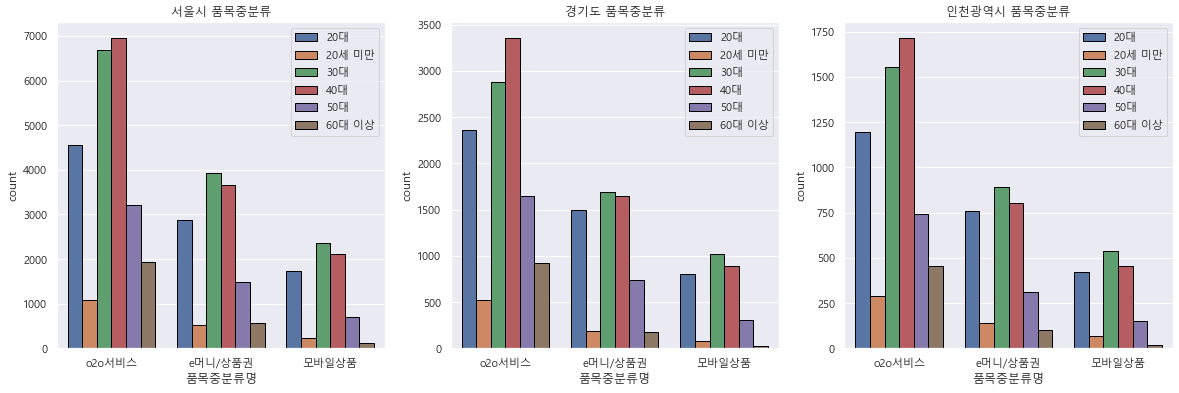

In [237]:
#지역 & 연령
data_e_Seoul.sort_values(by = ['연령'], inplace=True)
data_e_Gyeong.sort_values(by = ['연령'], inplace=True)
data_e_Incheon.sort_values(by = ['연령'], inplace=True)

#서울시 중분류
fig, ax = plt.subplots(figsize = (20, 6), ncols= 3)
sns.countplot(x = '품목중분류명', data = data_e_Seoul, ax = ax[0],edgecolor = 'black', order=group_names, hue = '연령')
ax[0].legend(loc = 'upper right')
ax[0].set_title('서울시 품목중분류')

#경기도 중분류
sns.countplot(x = '품목중분류명', data = data_e_Gyeong, ax = ax[1],edgecolor = 'black', order=group_names,hue = '연령')
ax[1].legend(loc = 'upper right')
ax[1].set_title('경기도 품목중분류')

#인천광역시 중분류
sns.countplot(x = '품목중분류명', data = data_e_Incheon, ax = ax[2], edgecolor = 'black', order= group_names, hue = '연령')
ax[2].legend(loc = 'upper right')
ax[2].set_title('인천광역시 품목중분류')

In [238]:
#지역 & 가구
data_e_Seoul.sort_values(by = ['가구생애주기'], inplace=True)
data_e_Gyeong.sort_values(by = ['가구생애주기'], inplace=True)
data_e_Incheon.sort_values(by = ['가구생애주기'], inplace=True)

<ipython-input-238-618927279661>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Seoul.sort_values(by = ['가구생애주기'], inplace=True)
<ipython-input-238-618927279661>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Gyeong.sort_values(by = ['가구생애주기'], inplace=True)
<ipython-input-238-618927279661>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Incheon.sort_values(by = ['가구생애주기'], inplace=True)


In [239]:
data_e['가구생애주기'].groupby(data_e['고객소재지_광역시도']).value_counts()

#조금 더 보기 쉽게 시각화

고객소재지_광역시도  가구생애주기 
경기도         신혼영유아가구     6791
            1인가구        5514
            초중고자녀가구     4165
            성인자녀가구      3148
            노인가구        1121
서울특별시       신혼영유아가구    14363
            1인가구       13301
            초중고자녀가구     7963
            성인자녀가구      6452
            노인가구        2633
인천광역시       신혼영유아가구     3400
            1인가구        2821
            초중고자녀가구     2119
            성인자녀가구      1690
            노인가구         571
Name: 가구생애주기, dtype: int64

Text(0.5, 1.0, '지역 & 가구생애주기')

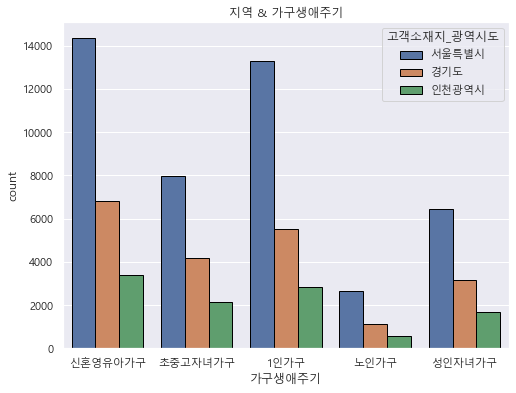

In [240]:
fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
sns.countplot(x = '가구생애주기', data = data_e, edgecolor = 'black', hue = '고객소재지_광역시도')
ax.set_title('지역 & 가구생애주기')

Text(0.5, 1.0, '인천광역시 가구생애주기')

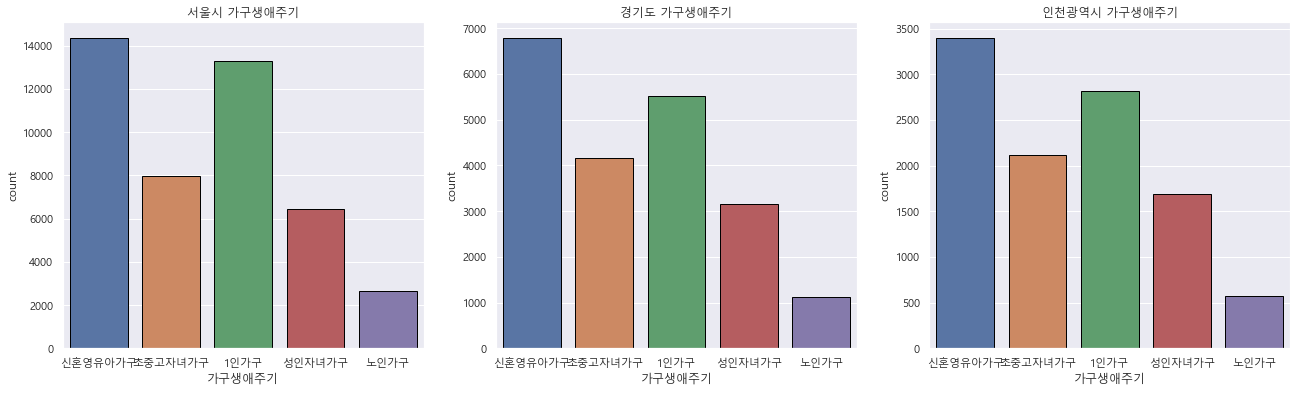

In [241]:
#도시별 가구생애주기
fig, ax = plt.subplots(figsize = (22, 6), ncols= 3)
group_names = ['신혼영유아가구','초중고자녀가구', '1인가구', '성인자녀가구', '노인가구']
sns.countplot(x = '가구생애주기', data = data_e_Seoul, ax = ax[0], edgecolor = 'black', order=group_names)
ax[0].set_title('서울시 가구생애주기')

#경기도 중분류
sns.countplot(x = '가구생애주기', data = data_e_Gyeong, ax = ax[1], edgecolor = 'black', order=group_names)
ax[1].set_title('경기도 가구생애주기')

#인천광역시 중분류
sns.countplot(x = '가구생애주기', data = data_e_Incheon, ax = ax[2], edgecolor = 'black', order=group_names)
ax[2].set_title('인천광역시 가구생애주기')


#서울시가 1인가구가 많음

In [242]:
data_e['기준년월'].groupby(data_e['고객소재지_광역시도']).value_counts()

고객소재지_광역시도  기준년월  
경기도         202003     5188
            202103     5126
            201909     4386
            202009     3334
            201903     2705
서울특별시       202003    11171
            202103    10826
            201909     9467
            202009     7282
            201903     5966
인천광역시       202003     2638
            202103     2592
            201909     2202
            202009     1738
            201903     1431
Name: 기준년월, dtype: int64

In [243]:
def get_M(feature):
    #데이터 정렬
    data_e_Seoul.sort_values(by = [feature], inplace=True)
    data_e_Gyeong.sort_values(by = [feature], inplace=True)
    data_e_Incheon.sort_values(by = [feature], inplace=True)

    #빈도수체크
    print(data_e[feature].groupby(data_e['고객소재지_광역시도']).value_counts())

    #서울시 중분류
    fig, ax = plt.subplots(figsize = (22, 6), ncols= 3)
    group_names = ['o2o서비스','e머니/상품권','모바일상품']
    sns.countplot(x = '품목중분류명', data = data_e_Seoul, ax = ax[0],edgecolor = 'black', order=group_names, hue = feature)
    ax[0].legend(loc = 'upper right')
    ax[0].set_title('서울시 품목중분류')

    #경기도 중분류
    sns.countplot(x = '품목중분류명', data = data_e_Gyeong, ax = ax[1],edgecolor = 'black', order=group_names,hue = feature)
    ax[1].legend(loc = 'upper right')
    ax[1].set_title('경기도 품목중분류')

    #인천광역시 중분류
    sns.countplot(x = '품목중분류명', data = data_e_Incheon, ax = ax[2], edgecolor = 'black', order= group_names, hue = feature)
    ax[2].legend(loc = 'upper right')
    ax[2].set_title('인천광역시 품목중분류')

<ipython-input-243-f1ff36f9cdd5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-243-f1ff36f9cdd5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-243-f1ff36f9cdd5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도  가구생애주기 
경기도         신혼영유아가구     6791
            1인가구        5514
            초중고자녀가구     4165
            성인자녀가구      3148
            노인가구        1121
서울특별시       신혼영유아가구    14363
            1인가구       13301
            초중고자녀가구     7963
            성인자녀가구      6452
            노인가구        2633
인천광역시       신혼영유아가구     3400
            1인가구        2821
            초중고자녀가구     2119
            성인자녀가구      1690
            노인가구         571
Name: 가구생애주기, dtype: int64


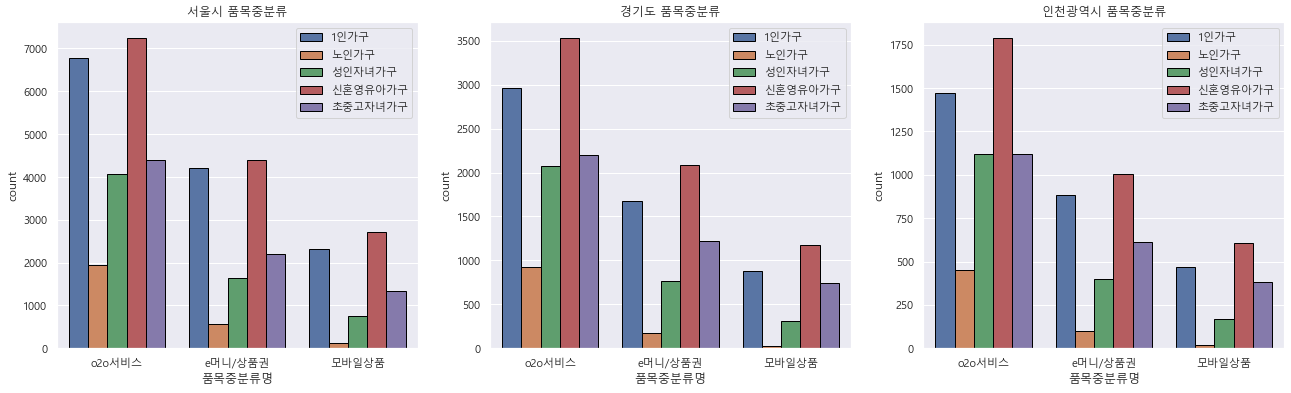

In [244]:
get_M('가구생애주기')

<ipython-input-243-f1ff36f9cdd5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-243-f1ff36f9cdd5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-243-f1ff36f9cdd5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도  기준년월  
경기도         202003     5188
            202103     5126
            201909     4386
            202009     3334
            201903     2705
서울특별시       202003    11171
            202103    10826
            201909     9467
            202009     7282
            201903     5966
인천광역시       202003     2638
            202103     2592
            201909     2202
            202009     1738
            201903     1431
Name: 기준년월, dtype: int64


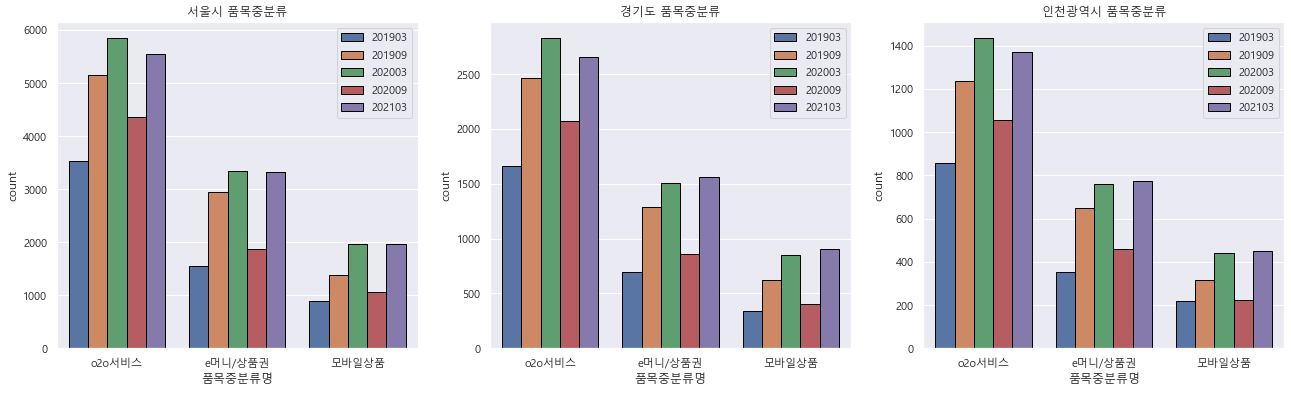

In [245]:
get_M('기준년월')

<ipython-input-246-fcab321e400a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Seoul.sort_values(by = ['품목중분류명'], inplace=True)
<ipython-input-246-fcab321e400a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Gyeong.sort_values(by = ['품목중분류명'], inplace=True)
<ipython-input-246-fcab321e400a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Incheon.sort_values(by = ['품목중분류명'], inplace=True)


고객소재지_광역시도  품목중분류명 
경기도         o2o서비스     11694
            e머니/상품권     5920
            모바일상품       3125
서울특별시       o2o서비스     24416
            e머니/상품권    13024
            모바일상품       7272
인천광역시       o2o서비스      5954
            e머니/상품권     2999
            모바일상품       1648
Name: 품목중분류명, dtype: int64


Text(0.5, 1.0, '인천광역시 품목중분류')

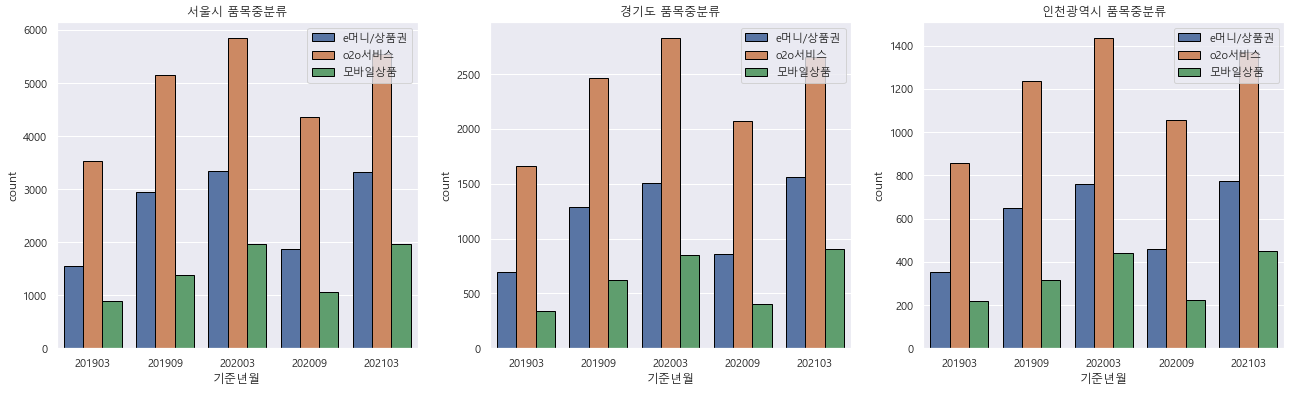

In [246]:
data_e_Seoul.sort_values(by = ['품목중분류명'], inplace=True)
data_e_Gyeong.sort_values(by = ['품목중분류명'], inplace=True)
data_e_Incheon.sort_values(by = ['품목중분류명'], inplace=True)

#빈도수체크
print(data_e['품목중분류명'].groupby(data_e['고객소재지_광역시도']).value_counts())

#서울시 중분류
fig, ax = plt.subplots(figsize = (22, 6), ncols= 3)
sns.countplot(x = '기준년월', data = data_e_Seoul, ax = ax[0],edgecolor = 'black', hue = '품목중분류명')
ax[0].legend(loc = 'upper right')
ax[0].set_title('서울시 품목중분류')

#경기도 중분류
sns.countplot(x = '기준년월', data = data_e_Gyeong, ax = ax[1],edgecolor = 'black',hue = '품목중분류명')
ax[1].legend(loc = 'upper right')
ax[1].set_title('경기도 품목중분류')

#인천광역시 중분류
sns.countplot(x = '기준년월', data = data_e_Incheon, ax = ax[2], edgecolor = 'black', hue = '품목중분류명')
ax[2].legend(loc = 'upper right')
ax[2].set_title('인천광역시 품목중분류')

<AxesSubplot:xlabel='기준년월', ylabel='count'>

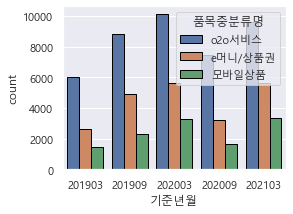

In [247]:
fig, ax = plt.subplots(1, 1, figsize = (4 ,3))
sns.countplot(x = '기준년월', data = data_e, hue = '품목중분류명',edgecolor = 'black')

In [248]:
def get_M_count(feature, feature2):
    #데이터 정렬
    data_e_Seoul.sort_values(by = [feature], inplace=True)
    data_e_Gyeong.sort_values(by = [feature], inplace=True)
    data_e_Incheon.sort_values(by = [feature], inplace=True)

    #빈도수체크
    print(data_e[feature].groupby(data_e['고객소재지_광역시도']).value_counts())

    #서울시 중분류
    fig, ax = plt.subplots(figsize = (22, 6), ncols= 3)
    group_names = data_e[feature2].unique().tolist()
    sns.countplot(x = feature2, data = data_e_Seoul, ax = ax[0],edgecolor = 'black', order= group_names,hue = feature)
    ax[0].legend(loc = 'upper right')
    ax[0].set_title('서울시 품목중분류')

    #경기도 중분류
    sns.countplot(x = feature2, data = data_e_Gyeong, ax = ax[1],edgecolor = 'black', order= group_names,hue = feature)
    ax[1].legend(loc = 'upper right')
    ax[1].set_title('경기도 품목중분류')

    #인천광역시 중분류
    sns.countplot(x = feature2, data = data_e_Incheon, ax = ax[2], edgecolor = 'black', order = group_names ,hue = feature)
    ax[2].legend(loc = 'upper right')
    ax[2].set_title('인천광역시 품목중분류')


#barplot를 통해 평균 시각화하는 함수
def get_M_bar(feature, feature2, y,ylim):
    #데이터 정렬
    data_e_Seoul.sort_values(by = [feature], inplace=True)
    data_e_Gyeong.sort_values(by = [feature], inplace=True)
    data_e_Incheon.sort_values(by = [feature], inplace=True)

    #빈도수체크
    print(data_e[y].groupby(data_e['고객소재지_광역시도']).mean())

    #서울시 중분류
    fig, ax = plt.subplots(figsize = (22, 6), ncols= 3)
    group_names = data_e[feature2].unique().tolist()
    sns.barplot(x = feature2, y = y, data = data_e_Seoul, ax = ax[0],edgecolor = 'black', order= group_names,hue = feature)
    ax[0].legend(loc = 'upper right')
    ax[0].set(ylim =ylim)
    ax[0].set_title('서울시 품목중분류')

    #경기도 중분류
    sns.barplot(x = feature2, y = y,data = data_e_Gyeong, ax = ax[1],edgecolor = 'black', order= group_names,hue = feature)
    ax[1].legend(loc = 'upper right')
    ax[1].set(ylim = ylim)
    ax[1].set_title('경기도 품목중분류')

    #인천광역시 중분류
    sns.barplot(x = feature2, y = y,data = data_e_Incheon, ax = ax[2], edgecolor = 'black', order = group_names ,hue = feature)
    ax[2].legend(loc = 'upper right')
    ax[2].set(ylim =ylim)
    ax[2].set_title('인천광역시 품목중분류')

def get_M_box(feature, feature2, y):
    #데이터 정렬
    data_e_Seoul.sort_values(by = [feature], inplace=True)
    data_e_Gyeong.sort_values(by = [feature], inplace=True)
    data_e_Incheon.sort_values(by = [feature], inplace=True)

    #빈도수체크
    print(data_e[y].groupby(data_e['고객소재지_광역시도']).mean())

    #서울시 중분류
    fig, ax = plt.subplots(figsize = (22, 6), ncols= 3)
    group_names = data_e[feature2].unique().tolist()
    sns.boxplot(x = feature2, y = y, data = data_e_Seoul, ax = ax[0], order= group_names,hue = feature)
    ax[0].legend(loc = 'upper right')
    ax[0].set_title('서울시 품목중분류')

    #경기도 중분류
    sns.boxplot(x = feature2, y = y,data = data_e_Gyeong, ax = ax[1], order= group_names,hue = feature)
    ax[1].legend(loc = 'upper right')
    ax[1].set_title('경기도 품목중분류')

    #인천광역시 중분류
    sns.boxplot(x = feature2, y = y,data = data_e_Incheon, ax = ax[2], order = group_names ,hue = feature)
    ax[2].legend(loc = 'upper right')
    ax[2].set_title('인천광역시 품목중분류')

<ipython-input-248-992b31c8b552>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-248-992b31c8b552>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-248-992b31c8b552>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도  품목중분류명 
경기도         o2o서비스     11694
            e머니/상품권     5920
            모바일상품       3125
서울특별시       o2o서비스     24416
            e머니/상품권    13024
            모바일상품       7272
인천광역시       o2o서비스      5954
            e머니/상품권     2999
            모바일상품       1648
Name: 품목중분류명, dtype: int64


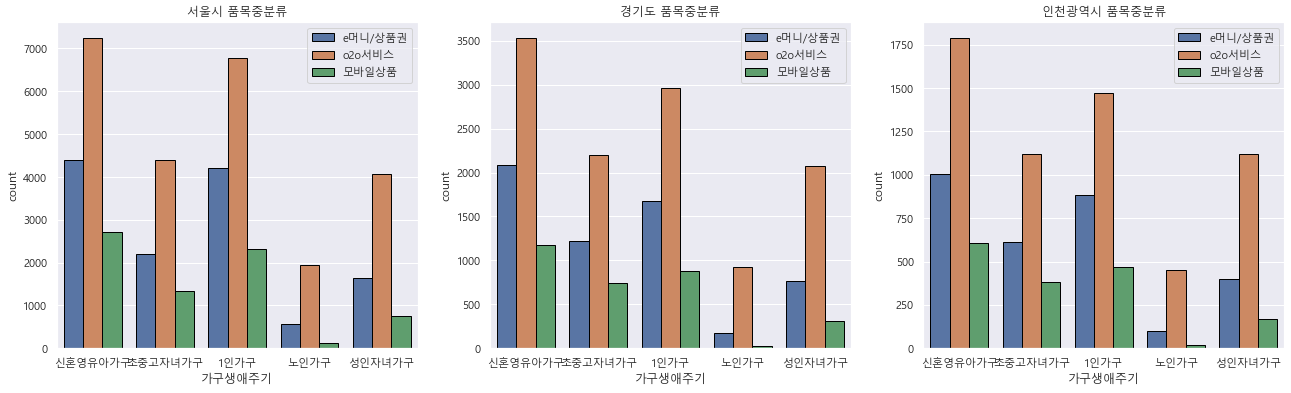

In [249]:
get_M_count('품목중분류명', '가구생애주기')

C:\Users\dudtj\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


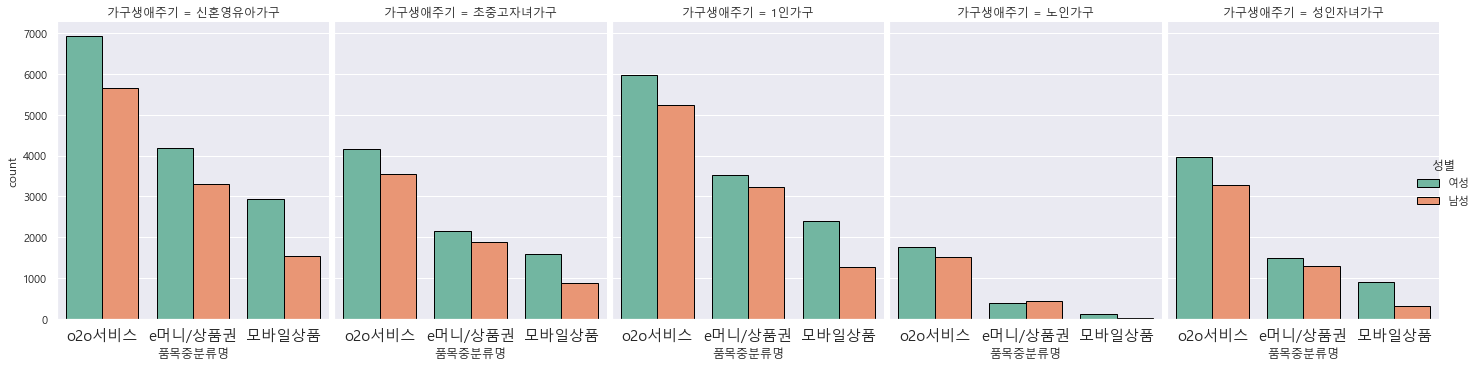

In [250]:
f=sns.factorplot(x = '품목중분류명', data = data_e, edgecolor= 'black', palette='Set2', hue = '성별', col = '가구생애주기', kind = 'count', aspect = 2)
f.fig.set_size_inches(20, 5)
f.set_xticklabels(['o2o서비스','e머니/상품권','모바일상품'], fontsize= 15)
plt.show()

<ipython-input-248-992b31c8b552>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-248-992b31c8b552>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-248-992b31c8b552>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도
경기도      497.133258
서울특별시    651.681603
인천광역시    563.108821
Name: 매출금액(단위:만원), dtype: float64


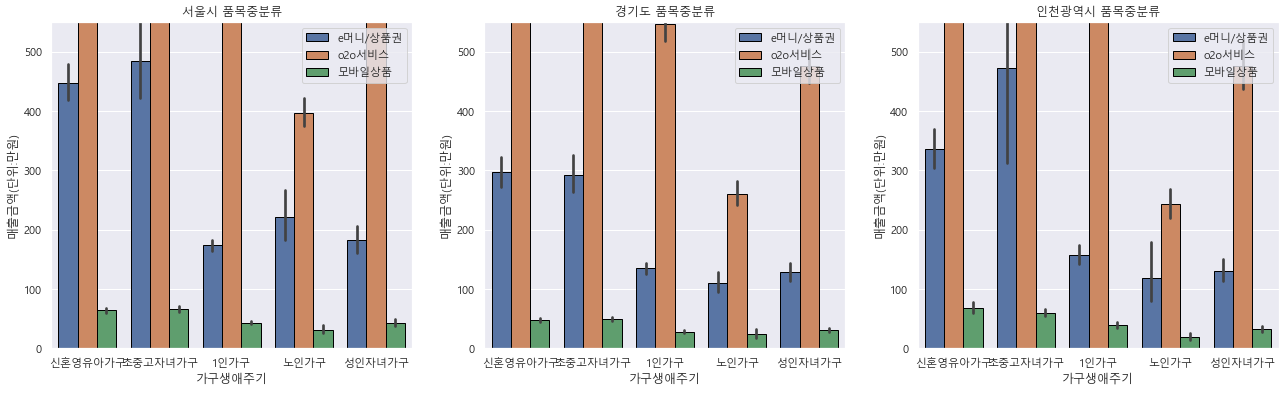

In [251]:
get_M_bar('품목중분류명', '가구생애주기', y = '매출금액(단위:만원)',ylim = [0, 550])


In [252]:
# data_s_Seoul_Gwan = data_s_Seoul[data_s_Seoul['고객소재지_시군구'] == '관악구']
# data_s_Seoul_Gwan
# fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
# group_names = ['노인가구', '초중고자녀가구', '성인자녀가구', '신혼영유아가구', '1인가구']
# ax.set(ylim = (0, 1000))
# sns.countplot(x = '가구생애주기', data= data_s_Seoul_Gwan, order=group_names)
# plt.title("관악구")

<AxesSubplot:title={'center':'성동구'}, xlabel='가구생애주기', ylabel='count'>

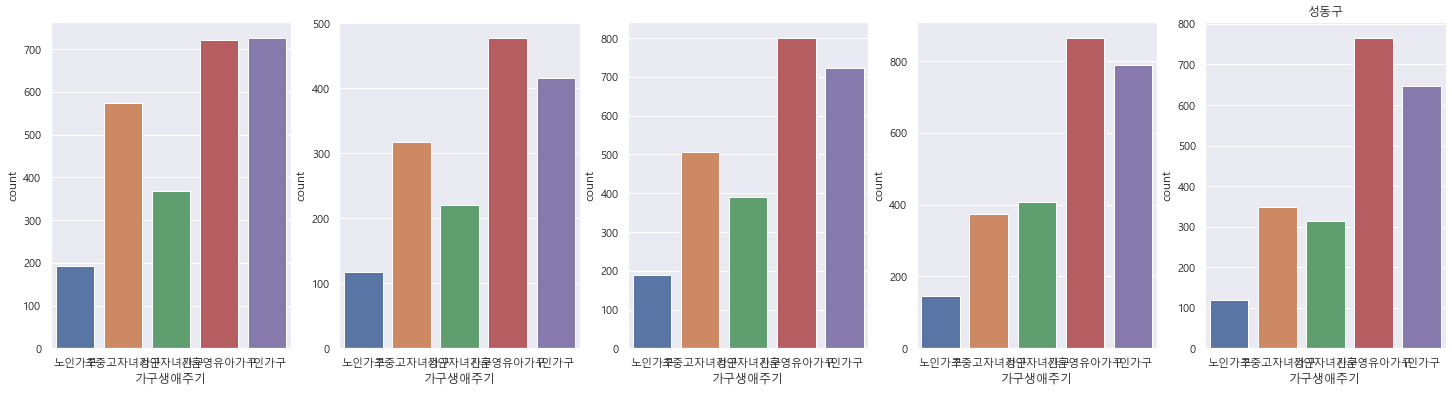

In [253]:
figure,((ax1,ax2,ax3,ax4,ax5))=plt.subplots(figsize=(25,6),nrows=1,ncols=5)
data_e_Seoul_GN = data_e_Seoul[data_e_Seoul['고객소재지_시군구'] == '강남구']
data_e_Seoul_GN
group_names = ['노인가구', '초중고자녀가구', '성인자녀가구', '신혼영유아가구', '1인가구']
ax.set(ylim = (0, 1000))
plt.title("강남구")
sns.countplot(x = '가구생애주기', data= data_e_Seoul_GN, order=group_names,ax=ax1)

data_e_Seoul_SC = data_e_Seoul[data_e_Seoul['고객소재지_시군구'] == '서초구']
data_e_Seoul_SC
group_names = ['노인가구', '초중고자녀가구', '성인자녀가구', '신혼영유아가구', '1인가구']
ax.set(ylim = (0, 1000))
plt.title("서초구")
sns.countplot(x = '가구생애주기', data= data_e_Seoul_SC, order=group_names,ax=ax2)


data_e_Seoul_SP = data_e_Seoul[data_e_Seoul['고객소재지_시군구'] == '송파구']
data_e_Seoul_SP
group_names = ['노인가구', '초중고자녀가구', '성인자녀가구', '신혼영유아가구', '1인가구']
ax.set(ylim = (0, 1000))
plt.title("송파구")
sns.countplot(x = '가구생애주기', data= data_e_Seoul_SP, order=group_names,ax=ax3)


data_e_Seoul_YS = data_e_Seoul[data_e_Seoul['고객소재지_시군구'] == '용산구']
data_e_Seoul_YS
group_names = ['노인가구', '초중고자녀가구', '성인자녀가구', '신혼영유아가구', '1인가구']
ax.set(ylim = (0, 1000))
plt.title("용산구")
sns.countplot(x = '가구생애주기', data= data_e_Seoul_YS, order=group_names,ax=ax4)


data_e_Seoul_SD = data_e_Seoul[data_e_Seoul['고객소재지_시군구'] == '성동구']
data_e_Seoul_SD
group_names = ['노인가구', '초중고자녀가구', '성인자녀가구', '신혼영유아가구', '1인가구']
ax.set(ylim = (0, 1000))
plt.title("성동구")
sns.countplot(x = '가구생애주기', data= data_e_Seoul_SD, order=group_names,ax=ax5)



<ipython-input-248-992b31c8b552>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-248-992b31c8b552>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-248-992b31c8b552>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도
경기도      3.990064
서울특별시    4.038326
인천광역시    3.517096
Name: 건당 매출금액(단위:만원), dtype: float64


<ipython-input-248-992b31c8b552>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-248-992b31c8b552>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-248-992b31c8b552>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도
경기도      128.610974
서울특별시    172.002639
인천광역시    165.215923
Name: 매출건수, dtype: float64


<ipython-input-248-992b31c8b552>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-248-992b31c8b552>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-248-992b31c8b552>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도
경기도      497.133258
서울특별시    651.681603
인천광역시    563.108821
Name: 매출금액(단위:만원), dtype: float64


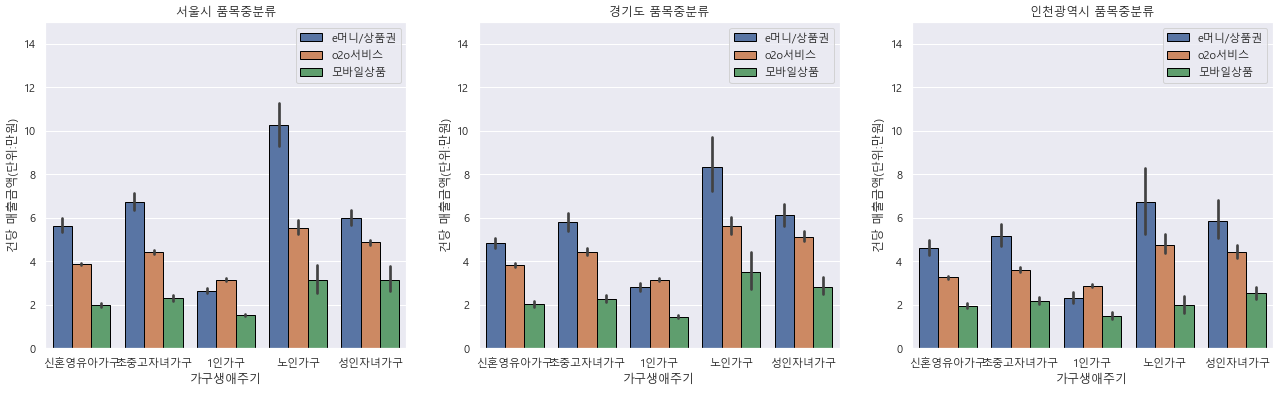

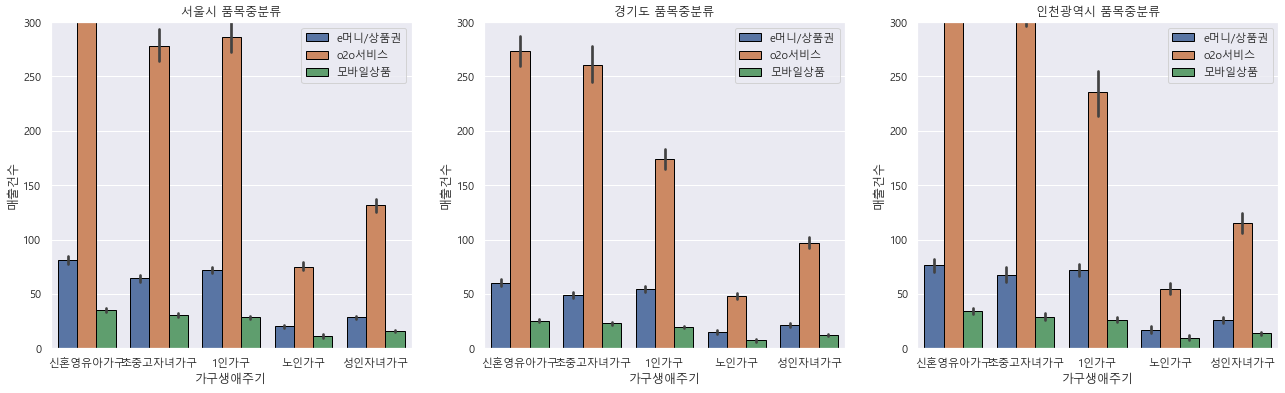

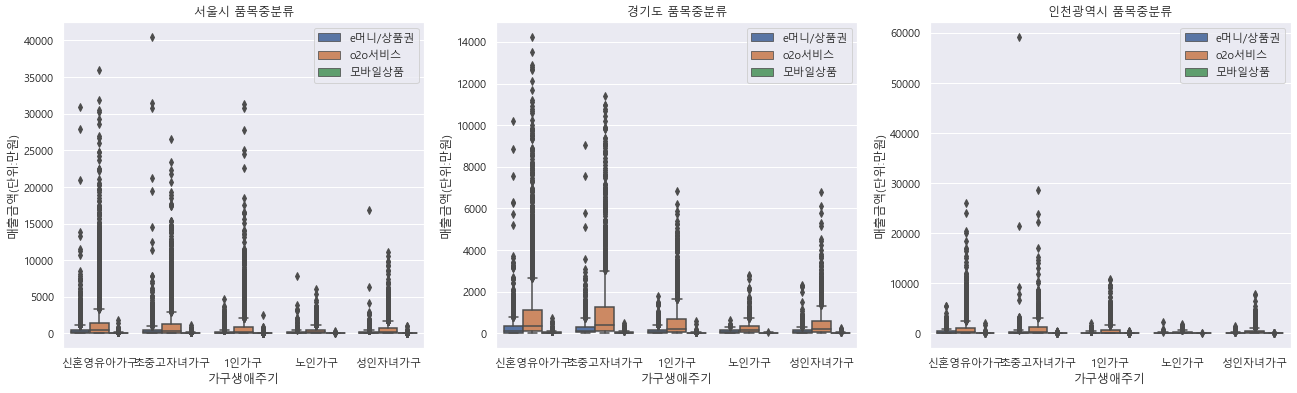

In [256]:
get_M_bar('품목중분류명', '가구생애주기', y = '건당 매출금액(단위:만원)',ylim=[0,15])
get_M_bar('품목중분류명', '가구생애주기', y = '매출건수',ylim = [0, 300])
get_M_box('품목중분류명', '가구생애주기', y = '매출금액(단위:만원)')